# Phase 2 Project
**Client:** Zillow Group, Inc
**Author**: Tommy Phung

## Overview
Zillow is an online real estate website that help home owners to buy, sell and rent homes. In order to give buyers and sellers a better idea of how much their homes should cost on the market, we will be using the dataset from King Country House Sales. The dataset has multiple potential attributes of a house that would justify a higher house price while others not as influencatial <br>
**Model 1:** The first model was modeling using square feet of living as the only paremeter. <br>
That reuslted in a relationship of a base cost of 260,974 and for every square foot, expected an increase in 355 which accounted for **36.2%** of the variance <br>

**Model 2:** The second model added grade, which was the second highest correlation, along side square feet of living  <br>
The base cost of -626890 for any given house. For every square foot increase the price by 231 while for ever grade increased the price by $150702. The model explains **41.8%** of the variance. <br>

**Model 3:** The third model add the house age which was expected to lower the house price. <br>
The base cost of -1,286,000 for any given house. For every square foot increase the price by 221 while for ever grade increased the price by $216,400. For every year the house increase by 3867 due to age. The model explains **46.4%** of the variance.<br>

**Final Model V1:** The final model has most of the attibutes of a house that proved to be linearly beneficial to price. Interation terms were added as well with grade and square feet of living, the top two correlation to price. The model explains **50.1%** of the variance. <br>

**Final Model V2:** Some of the final model weren't statistically significant and had little to no impact. There were remove for a cleaner interpretation. Since, adding parameter only increases the R squared score, this model explained **49.6%** of the variance. 

## Business Understanding

My client is Zillow, which help buyers and sellers thorugh their websites to give an overview on what a house would cost and arrange with agents and tours. <br>
Currently, houses are sold with the given information and price that the seller wants to post. There are selling cost posted on the website that anyone could see but doesn't explain why a house increase or decrease in price. Whether or not, that is accurate is determine by the buyer but to give the seller the best chances in selling their house, a model could be used to guage how much the house can be reasonable sold and potenitally how much in the future. Knowing what a house cost will ensure that a seller is never underselling or a buyer overpaying for a house. 

The current housing market are competivive for both buyers and sellers. <br>
For buyers, they would need to know whether a house is actually worth the market asking price. Houses can be inflated based on the loaction and giving buyers more insight whether its worth the price that are being marketed. <br>
For sellers, most are flipping houses to increase in vlaue before putting them back up in the market. Giving the knowledge on what buyers want can give seller the edge in ivnest in part of the house that would give the best price increase. 

Price is argualbly the most important aspect on purchasng a house so we will be looking at how the cost change based on different attributes. A model is created to let Zillow be able to integrate and let buyer and seller what the price should be. Zillow does have an estimate which could be replacing or combined with to make a better model. 

## Data Understanding
The dataset that is being used is from [Kong County](https://kingcounty.gov/) <br>

There are **30155** house listed in the dataset with **25** different columns. Although there are alot of attributes in a house, not all of them influence the house price. By plotting and modelling the different variabels, we can see which attributes are important and which to ignore. This data spans to as late 1900 so there is substanial amount of data from the years that can give a rough idea on the housing market in the area. <br>

Using dummy variables, we can model the continuous variables with the categorical variables to determine which combination of parameters are useful in predicting the house price. <br>

Although we would like to use all of the avaiable data, that is simpling not easy to model so some variables are excluded. Some variables such as ID, address, latitude and longitude are excluded since they should have any influence in price. The following were the columns in the dataset to consider and the ones that were removed. 

**Continuous Datatype:** <br>
'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio' <br>
**Categorical Datatype:** <br>
'bedrooms', 'bathrooms', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'condition', 'view', 'grade', 'heat_source', 'sewer_system' <br>
**Unused Attributes:** <br>
'date', 'id', 'lat', 'long', 'address'<br>

*After exploring the dataset, I decided to remove these attributes for the following reason.* <br>
**sqft_above** - Similar or identical to sqft_living <br>
**nuisance** - Evenly split with relatively little different if a house have a nuisance or doesnt have a nuisance <br>

## Data Imports
Imported libraries that were used in the project.

In [1]:
import pandas as pd  
from resources import custom_change as cc   # All functions created for project
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore")    # Used to temporary silence warnings
%matplotlib inline

In [2]:
df = pd.read_csv('dsc-phase-2-project-v2-5-main/data/kc_house_data.csv')    #Read the file
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


## Data Preperation 
Before I can create a model with all of the given parameter, I need to prepare the categorical data and remove outliers. 

In [3]:
## Setup for columns and subsets
useful_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront'
              , 'greenbelt', 'view', 'condition', 'grade', 'heat_source', 'sewer_system'
              , 'sqft_basement', 'sqft_garage', 'sqft_patio', 'nuisance', 'sqft_above','yr_built' ]

useless_col = ['date', 'id', 'lat', 'long', 'address']
categorical = [ 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'greenbelt',
               'view', 'condition', 'grade', 'heat_source', 'sewer_system']
object_categories = ['waterfront', 'greenbelt', 'view', 'condition', 'heat_source', 'sewer_system']
continuous = [column for column in useful_col if column not in categorical] # 'price','sqft_living', 'sqft_lot', 
                                                                            # 'sqft_basement', 'sqft_garage', 'sqft_patio'

### Data Cleaning - Overall Cleaning
1. Remove missing values - Not too many and large enough sample size to safely remove
2. Remove duplicates - Only one duplicate in the set that has the same data
3. Remove unused columns - Not going to consider so the dataframe will be sliced without them
4. Rename grade - Since grade was a mixed string and integers, integer was easier to model to start with

In [4]:
## Data is removed if they are duplicates or if they are outliers or not going to be in the model ## 

df_cleaned = cc.check_and_drop(df)    ## Dropped and removed rows that has small amount of missing values
df_cleaned = cc.outliers_remove(df_cleaned, 'price')    ## Remove outliers of price
df_cleaned.drop(labels = useless_col, axis = 1, inplace = True)    # Drop columns that wont be useful right now
df_cleaned.drop(df_cleaned.loc[df_cleaned['sqft_living'] == 0].index, inplace = True)    ## Found a house that has sqft_living of 0 which messes with some plotting

Number of Missing Values: 46
Dropping rows: heat_source
Dropping rows: sewer_system
Number of duplicates: 1
Removed 1 duplicates
1214 observations were removed. 


In [5]:
## Map dictionary to change the strings in integer. ##
grade_map = {'7 Average': 7, '8 Good': 8, '9 Better': 9, '6 Low Average': 6, '10 Very Good': 10, '5 Fair': 5, 
             '11 Excellent': 11, '4 Low': 4, '12 Luxury':12, '3 Poor': 3, '13 Mansion': 13, '2 Substandard' : 2}
df_cleaned.replace(grade_map, inplace= True)

In [6]:
## New variable to account for the year a house was renovated
## Yr_built is changed to be House Age. 

df_cleaned['relative_age'] = df_cleaned['yr_built'].max() - df_cleaned['yr_renovated']
df_cleaned['relative_age'].loc[df_cleaned['relative_age'] == 2022] = df_cleaned['yr_built'].max() - df_cleaned['yr_built']
df_cleaned['house_age'] = df_cleaned['yr_built'].max() - df_cleaned['yr_built'] 

In [33]:
## Create the dummy variables and remove certain columns to get a reference

df_w_dummies = pd.get_dummies(df_cleaned)    ## Create Dummy variables
base = ['waterfront_NO', 'greenbelt_NO', 'nuisance_NO', 'view_NONE', 'condition_Poor', 'heat_source_Oil', 'sewer_system_PRIVATE']    ## When creating dummy variables, the data need a reference to avoid the dummy trap. 
df_w_dummies.drop(base, axis = 1, inplace= True)

### Model 1 Preperation

In [40]:
## New dataframe with grade as a string object instead of a integer object

df_second_dum = df_w_dummies.copy()
df_second_dum['grade'] = df_second_dum['grade'].astype(str)
df_second_dum = pd.get_dummies(df_second_dum, columns= ['grade'],drop_first= True)     ## Grade 10 was dropped

In [34]:
## First consideration to the model

best_corr = cc.correlation_with(df_w_dummies, 'price')    ## Helper function that return the variables that correlate to a given column and return them as a list
best_corr[0]    ## The best correlating parameter

('sqft_living', 0.6019551412003955)

## Baseline Model

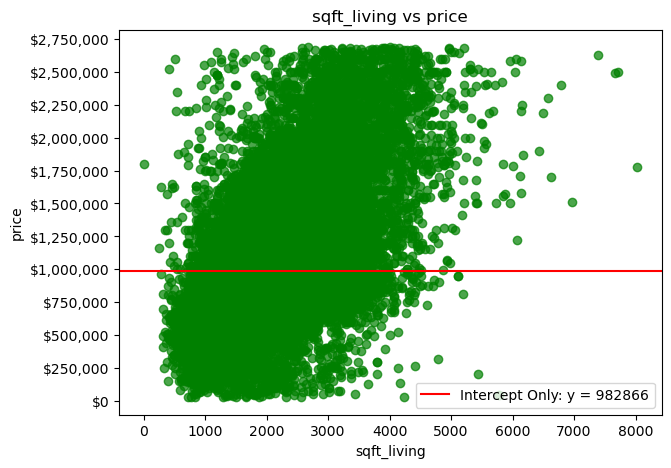

In [36]:
cc.plot_dataframe(df_w_dummies[['sqft_living']],  df_w_dummies[['price']],df_w_dummies['price'].mean());

### Evaluation
Although the model is very simple, it does not take into account anything with the house attributes. There is also a uneven ammount of houses above and below the price average that the model doesn't fit well. <br>
There is a clear positive relationship that can perform better than intercept only model. There are some variables that have high correlations that could prove useful. 

## First Model

### Model - Square Feet of Living 
The first model has only the square feet of living since it has the highest correlation to the price. 

In [37]:
X = df_w_dummies[['sqft_living']]    #One variable 
y = df_w_dummies['price']    # Always with price as dependent
model_living, result_living = model_and_regression(X, y);
print(result_living.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                 1.642e+04
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:37:11   Log-Likelihood:            -4.1338e+05
No. Observations:               28896   AIC:                         8.268e+05
Df Residuals:                   28894   BIC:                         8.268e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         2.61e+05   6094.353     42.822      

### Regression Plot 

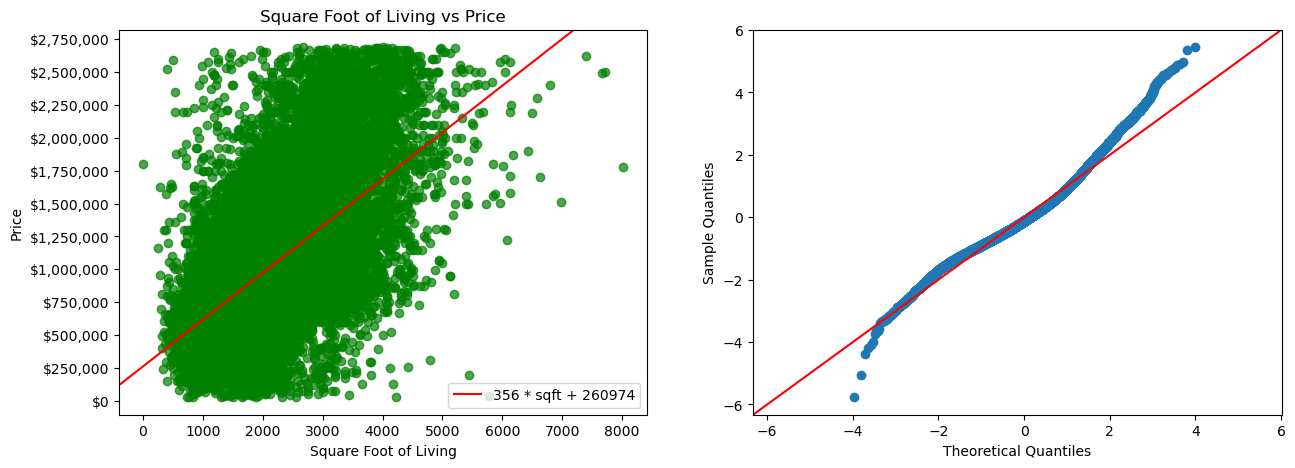

In [38]:
### Graph the scatter plot and the regression plot along the same plot
fig, ax = plt.subplots(ncols=2, figsize = (15,5))

ax[0].scatter(df_w_dummies['sqft_living'], df_w_dummies['price'], alpha = .7, color = 'green')
ax[0].set_ylabel('Price')
ax[0].set_xlabel('Square Foot of Living')

ax[0].set_title('Square Foot of Living vs Price')
y_ticks = np.arange(0,3000000, 250000)
y_ticks_str = ['${:,}'.format(y) for y in y_ticks]
ax[0].set_yticks(np.arange(0,3000000, 250000));
ax[0].set_yticklabels(y_ticks_str);

fig_1 = sm.graphics.abline_plot(model_results= result_living, ax = ax[0], color = 'red', label = '{} * sqft + {}'.format(round(result_living.params[1]), 
                                                                                                                      round(result_living.params[0])))
ax[0].legend();
fig_1_res = sm.graphics.qqplot(result_living.resid, dist=stats.norm, line='45', fit=True, ax= ax[1])

### Model Exvaluation
**The given states that the starting cost of a house is $260,974 and for every square foot of living space a house has, the price increases by 355.** <br>

Our first model can explain **36.2%** of the variance of price with the parameter, sqft_living. sqft_living is statistically significant having a p-value less than .05. <br>
The single parameter perform well but we will try to see whether a combination of parameter can make the model better. Once the houses gets too expensive or cheaper, the model becomes less accurate. This make sense since the range in price and square feet varies greatly. 

## Second Model
For the second model, we will be adding the second highest correlation with price. Grade had the second and is a numerical category data. 

### Model - (result_living_grade)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                 1.038e+04
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:37:53   Log-Likelihood:            -4.1206e+05
No. Observations:               28896   AIC:                         8.241e+05
Df Residuals:                   28893   BIC:                         8.241e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.269e+05   1.79e+04    -35.113      

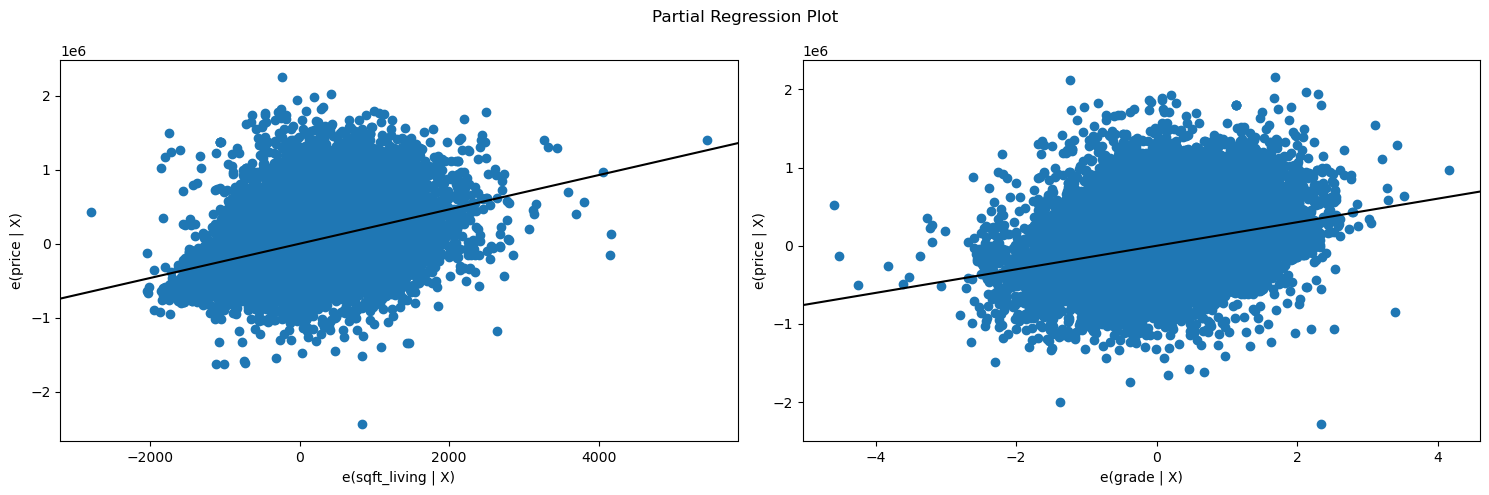

In [39]:
X = df_w_dummies[[ 'sqft_living', 'grade']]
y = df_w_dummies['price']

model_2, result_2 = cc.model_and_regression(X,y)

### Model Evaluation
**The new model states that a price of a house starts with -626,890 and for every every square foot of living increase the price by 231. Alternatively, for every grade a house has, the price is expected to increase by 150,702.** <br>

Our new model now explain **41.8%** of the variance of the price with sqft_living and grade. Both sqft_living and grade are statistically significant with p-values less than .05. <br> 
This model make sense since a house with nothing, living space or grade has no value which is why the constant is negative. Square foot have an effect to the price but not as high as grade. Grade refer back to how the house well the house was built. Grade seems more impactful since they only range from 1-13 and both seems to positvitly effect the price of the house. 

Grade can be broken down to their specific grade and we can see the individual effects of grade.

#### Model Alternative
Grade was change to categorical objects and created dummy variables

In [41]:
X = df_second_dum[[ 'sqft_living', 'grade_11',
       'grade_12', 'grade_13', 'grade_2', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9']]
y = df_second_dum['price']
model_2_dum = sm.OLS(y, sm.add_constant(X))
result_2_dum = model_2_dum.fit()
print(result_2_dum.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     1839.
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:37:59   Log-Likelihood:            -4.1168e+05
No. Observations:               28896   AIC:                         8.234e+05
Df Residuals:                   28883   BIC:                         8.235e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.042e+06   1.72e+04     60.491      

## Third Model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     8347.
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:38:02   Log-Likelihood:            -4.1086e+05
No. Observations:               28896   AIC:                         8.217e+05
Df Residuals:                   28892   BIC:                         8.218e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.286e+06   2.16e+04    -59.456      

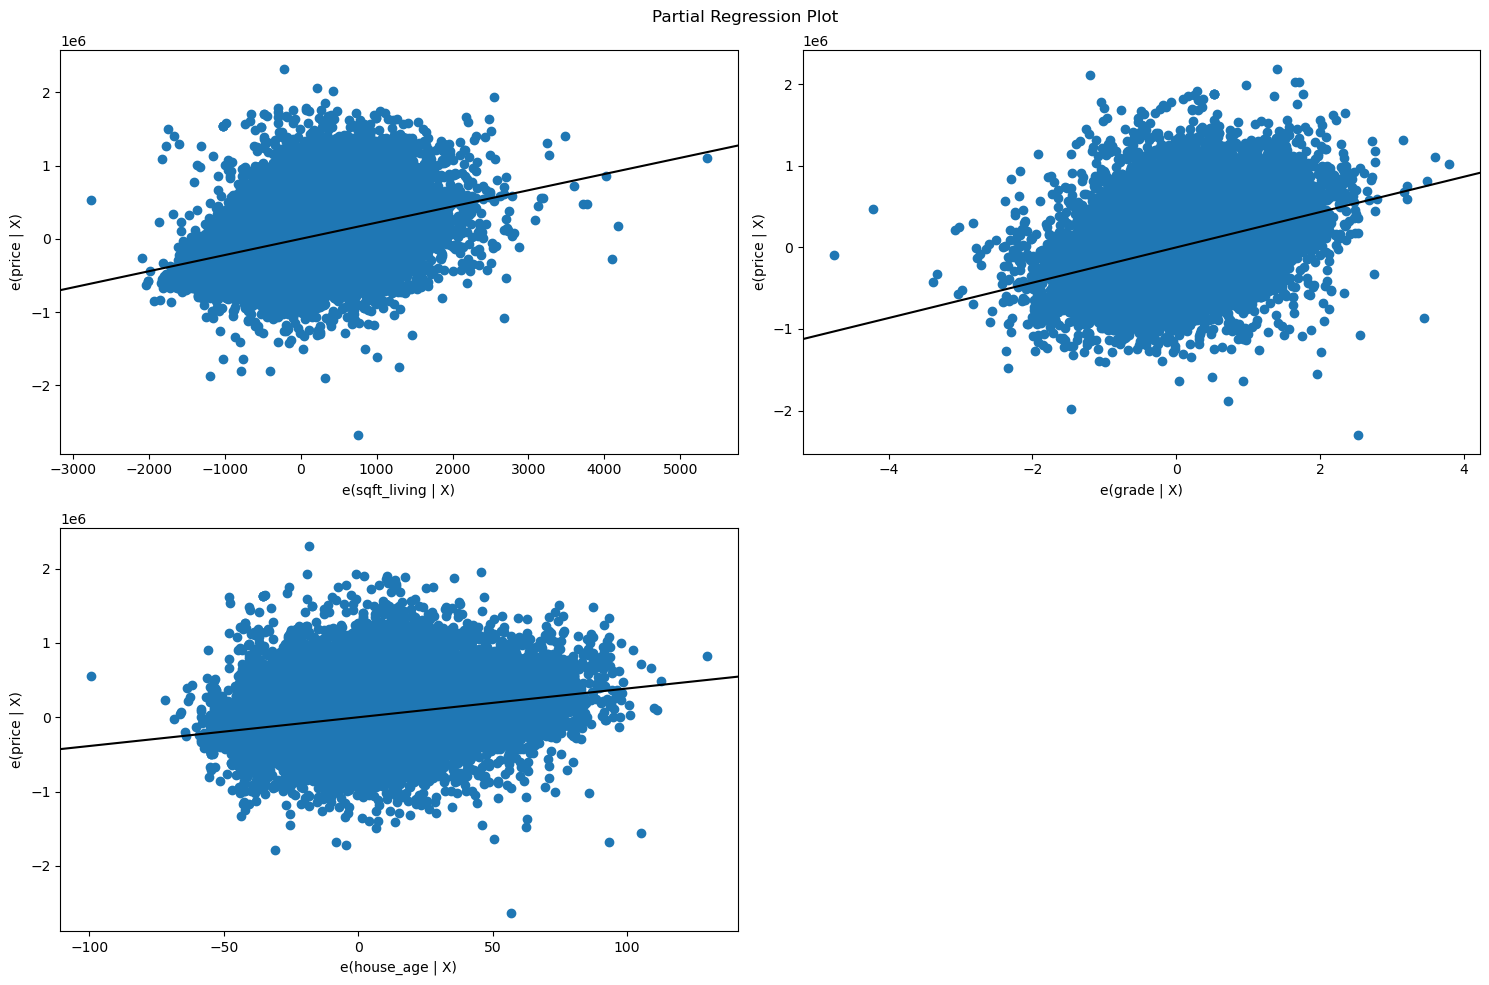

In [42]:
X = df_w_dummies[[ 'sqft_living', 'grade', 'house_age']]
y = df_w_dummies['price']

model_3, result_3 = cc.model_and_regression(X,y)

**The third model states that a price of a house starts with -1,286,000 and for every every square foot of living increase the price by 221. Alternatively, for every grade a house has, the price is expected to increase by 216,400. The house price also increases by 3867 for the house age.** <br>

Our new model now explain **46.4%** of the variance of the price with sqft_living, grade and house age. All of the parameter are statistically significant with p-values less than .05. <br> 
The house starts with a negative price with each parameter increasing the house price. The main factor of price was grade as they are limited to only 1-13 range. Next would be age, which only continue to increase in value follow by square feet of living. 

When grade is seperated as a category, we can se that only grade 11 and 12 increase the value of the house while the rest only decreases. Surprisingly, grade 13 negatively effect price but that could be due to the limited sample size. Grade 13 are classed as mansions. This model explains **47.6%** which is a 1.2% increase compared to grade being grouped together. 

In [43]:
X = df_second_dum[[ 'sqft_living', 'grade_11',
       'grade_12', 'grade_13', 'grade_2', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'house_age' ]]
y = df_second_dum['price']
model_living_grade_2 = sm.OLS(y, sm.add_constant(X))
result_living_grade_2 = model_living_grade_2.fit()
print(result_living_grade_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     2022.
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:38:05   Log-Likelihood:            -4.1053e+05
No. Observations:               28896   AIC:                         8.211e+05
Df Residuals:                   28882   BIC:                         8.212e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.682e+05   1.66e+04     58.213      

## Extra Plots - Potentially significant
Although it is hard to interpret categorical variables, I was able to make some conclusion to have them included in the final model. <br> 
**Results**: The mean price of a house with or without nuisance are negilable while a house being at a waterfront or greenbelt has a significant difference. 

In [ ]:
def group_by_2_cat(dateframe, categories, category_name):
    "Finish this"

In [62]:
x_group = []
for cat in ['waterfront', 'greenbelt', 'nuisance']:
    grouped = df_cleaned[[cat, 'price']].groupby(cat).mean().values
    x_group.append([value[0] for value in grouped.tolist()])


[980609.02676007, 1169082.020231214]
[973878.9846339473, 1336058.8354253836]
[987669.2607477417, 959819.9699036918]
[1211869.4991452992, 1517560.1415929203, 1305641.3617021276, 1350287.7456492637, 947364.6233424827]


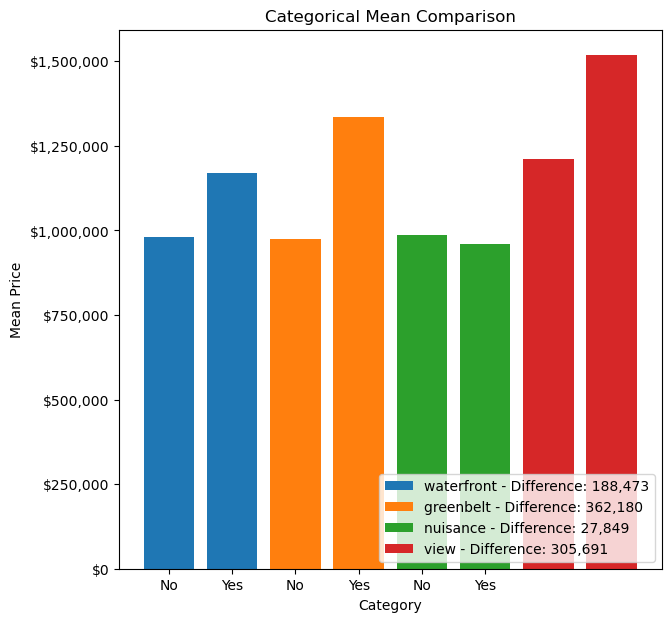

In [61]:
fig, ax = plt.subplots(figsize = (7, 7));    # Setup for plotting 
label =['waterfront', 'greenbelt', 'nuisance', 'view']    #Labels for the legend and labels
r = np.arange(2)    # Spacing for the bar plots
width = 2    # Basic width of each bar
index = 0    # Index through all the groups

### Plot each of the groups side by side for clarity
for group in x_group:
    
    ax.bar(r + width * index, group[0:2], label = '{} - Difference: {:,}'.format(label[index], abs(round(group[1]-group[0]))));
    index += 1
### Ticks labeling and spacing 
x_ticks = np.arange(6)    
y_ticks = np.arange(0,1750000, 250000)
y_ticks_str = ['${:,}'.format(y) for y in y_ticks]

plt.title('Categorical Mean Comparison');
plt.xlabel('Category')
plt.ylabel('Mean Price');
plt.xticks(x_ticks, ['No','Yes','No','Yes','No','Yes']);

ax.set_yticks(np.arange(0,1750000, 250000));
ax.set_yticklabels(y_ticks_str);

plt.legend(loc = 'lower right');

# Final Model
For the final model, there are a couple that needed to be considered. <br>
First, the final model will include as many parameters as possible (at first) and all of the categorical data types needs dummy variables. <br>
While exploring the dataset, some categories have very observation so I grouped them using 300 (roughly 1%) as the cut off. <br>
And lastly, I change grade to be an integer for the sake of modeling earlier but will change it back to an object and create dummy variables and intereaction term with square foot of living. The reason was that both were highly correlating to price leaving the best chances to be interactive with one another.

## Final Model Preperations

In [44]:
## All categories and the number of times they appear
df_other = df_cleaned.copy()

## Grouped all the categories that are less than 300 
for column in ['view', 'condition','heat_source', 'sewer_system']:
    replace = df_other[column].value_counts()[df_other[column].value_counts()< 300].index
    df_other[column].replace(replace, value= 'other',inplace= True)
    
## Convert Grade back into a string object
df_other['grade'] = df_other['grade'].astype(str)
df_final = pd.get_dummies(df_other, drop_first= True)

## Create interaction terms with each of the grades
for level in [2,4,5,6,7,8,9, 11,12,13]:
    df_final['grade{}*living'.format(level)] = df_final['grade_{}'.format(level)] * df_final['sqft_living']

In [45]:
X = df_final[df_final.columns[1:]]
y = df_final['price']
model_final= sm.OLS(y, sm.add_constant(X))
results_final = model_final.fit()
print(results_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     631.0
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:38:29   Log-Likelihood:            -4.0982e+05
No. Observations:               28896   AIC:                         8.197e+05
Df Residuals:                   28849   BIC:                         8.201e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.4720    

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


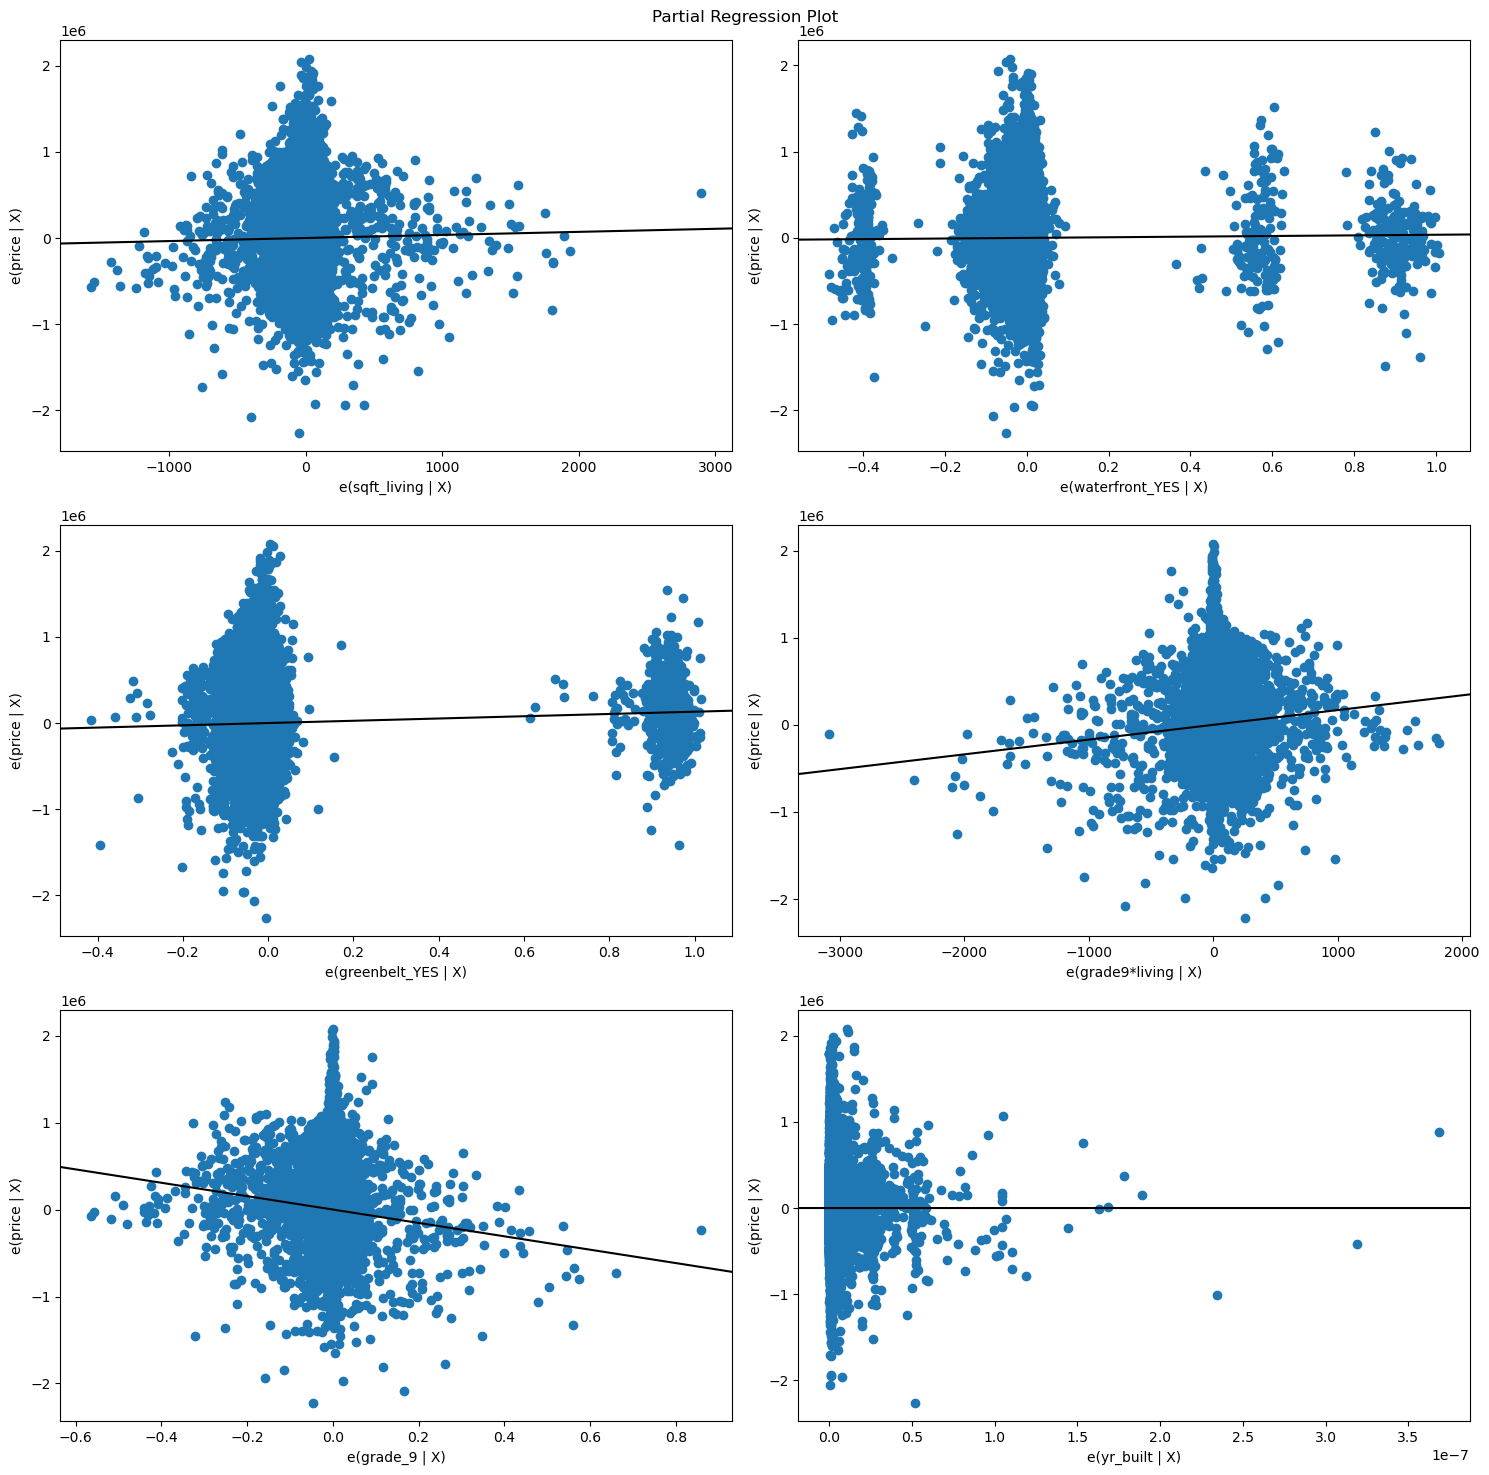

In [22]:
fig = plt.figure(figsize=(15,15));
sm.graphics.plot_partregress_grid(results_final, exog_idx=['sqft_living','waterfront_YES', 'greenbelt_YES', 'grade9*living','grade_9','yr_built' ], fig= fig);
plt.tight_layout();

## Clean Final Model
Although the final model explains over 50% of the variance, there was a good amount of parameters that were statictally insignifcant or didn't have a strong relationship to justify them being in the model. <br>
I kept most of the contiuous parameters while removed the categorical parameters to obtain a slightly different model. <br>
The advantage of the model is that all parameters that are expected to increase or decrease price are reflect in the model and are statiscially significant. Keepign the relavanet parameters will give stakeholders a better idea on what truly influences price by a degree that would be worht while to invest into. 

In [23]:
X = df_final[['sqft_living','floors',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'house_age',
        'greenbelt_YES', 'view_EXCELLENT', 'view_NONE',
       'view_other', 'condition_Good', 'condition_Very Good',
       'condition_other', 'heat_source_Gas', 
       'heat_source_other',
       'grade_11', 'grade_12', 'grade_13', 'grade_2', 'grade_3', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade2*living',
       'grade4*living', 'grade5*living', 'grade7*living',
       'grade8*living', 'grade9*living','grade13*living']]
y = df_final['price']
model_final_2 = sm.OLS(y, sm.add_constant(X))
result_final_2 = model_final_2.fit()
print(result_final_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     909.0
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:56:26   Log-Likelihood:            -4.1004e+05
No. Observations:               28896   AIC:                         8.201e+05
Df Residuals:                   28864   BIC:                         8.204e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.355e+06   4

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


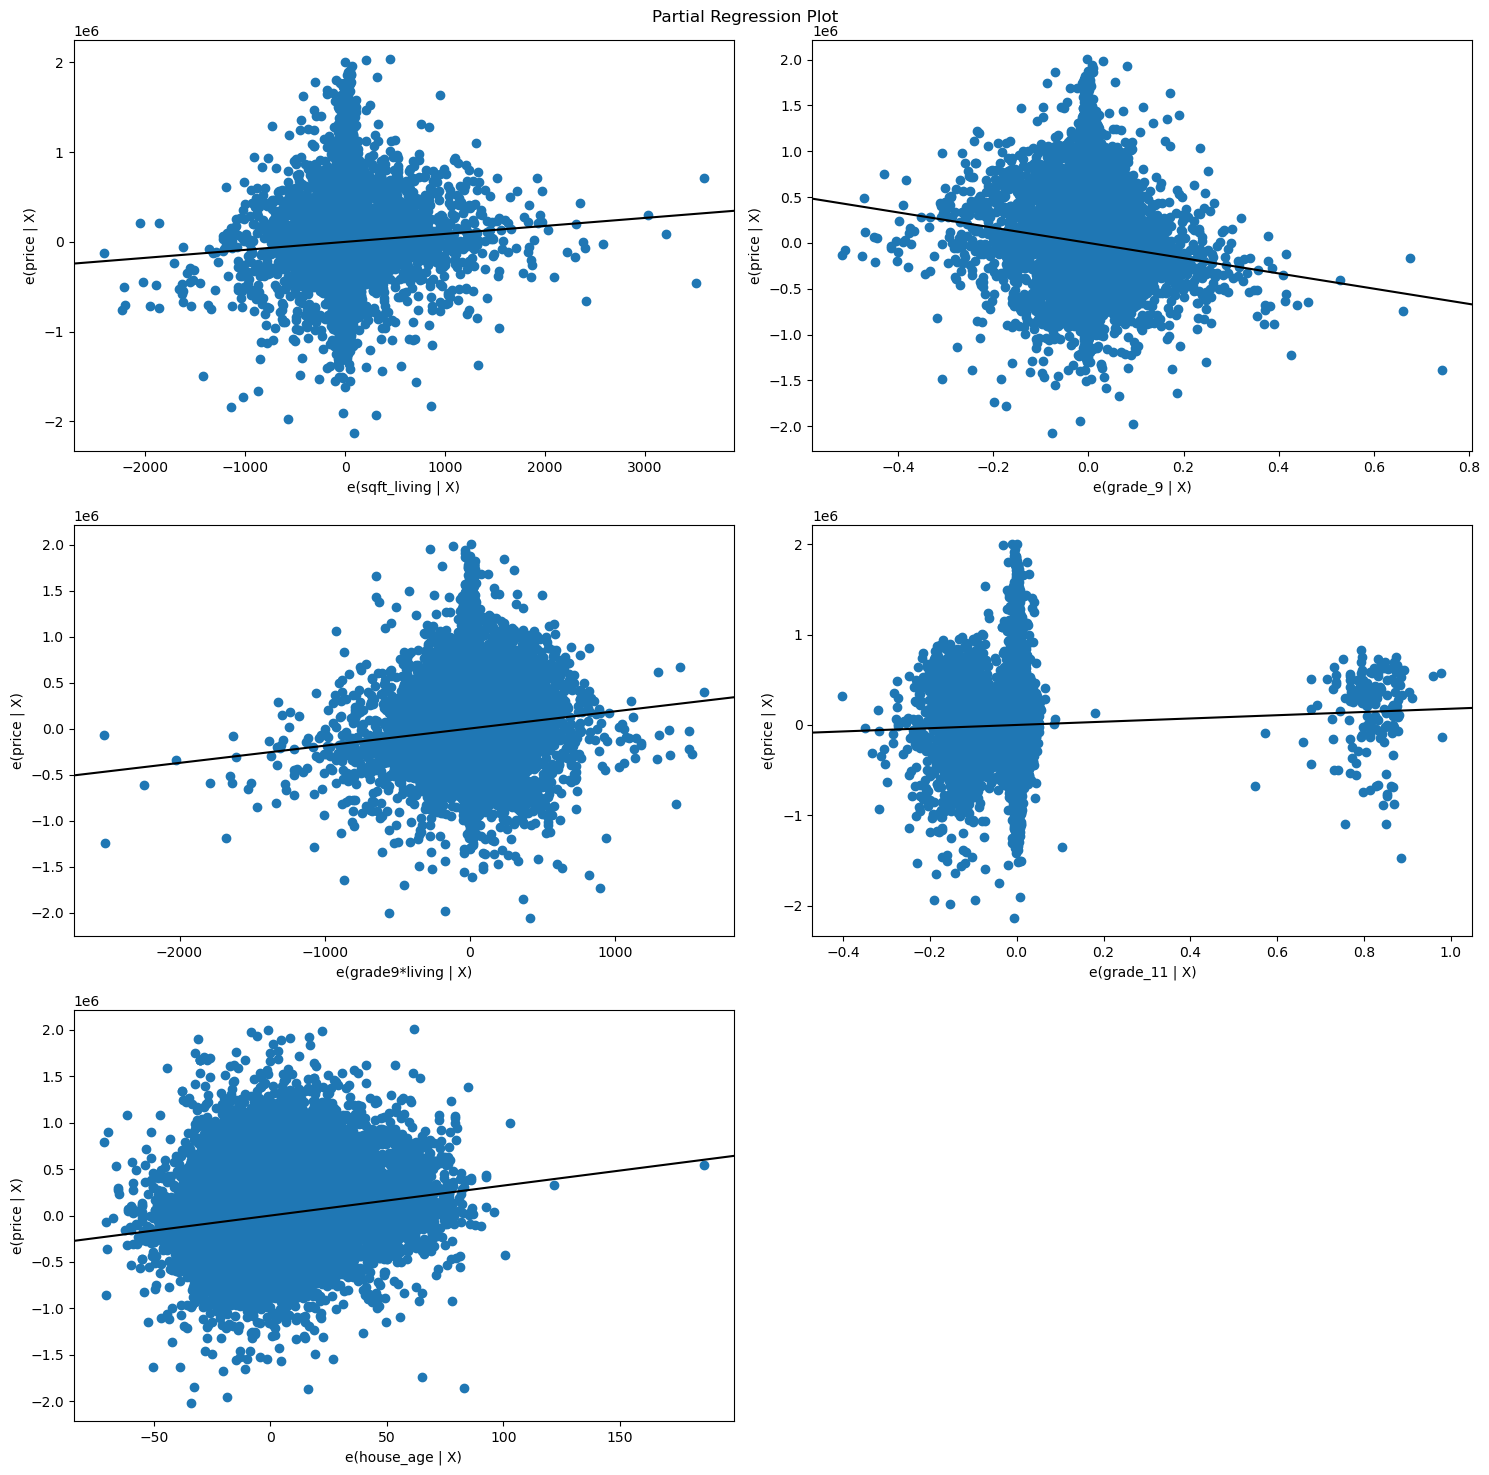

In [25]:
fig = plt.figure(figsize=(15,15));
sm.graphics.plot_partregress_grid(result_final_2, exog_idx=['sqft_living', 'grade_9', 'grade9*living','grade_11','house_age' ], fig= fig);
plt.tight_layout();